# Time Series Forecasting Practice Exercise

In this practice exercise, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in the `Datasets` file with the name `Aquifer_Petrignano` the target is to predict `Depth_to_Groundwater_P24` column.

## Dataset: Aquifer Petrignano

### Dataset Overview:

- **Name**: Aquifer Petrignano
- **Description**: This dataset contains time series data related to groundwater levels, rainfall, temperature, and hydrometry in the Aquifer Petrignano region. The data is collected over multiple years, capturing various environmental measurements. It is particularly useful for modeling groundwater levels, climate analysis, and time series forecasting.
- **Time Period**: Starting from 14/03/2006
- **Frequency**: Daily observations

### Features:

1. **Date**: The date of the observation in `DD/MM/YYYY` format.
2. **Rainfall_Bastia_Umbra**: Daily rainfall measurement in the Bastia Umbra region (mm).
3. **Depth_to_Groundwater_P24**: Depth to groundwater at observation point P24 (meters).
4. **Depth_to_Groundwater_P25**: Depth to groundwater at observation point P25 (meters).
5. **Temperature_Bastia_Umbra**: Daily temperature in the Bastia Umbra region (°C).
6. **Temperature_Petrignano**: Daily temperature in the Petrignano region (°C).
7. **Volume_C10_Petrignano**: Water volume measured at station C10 in Petrignano (m³).
8. **Hydrometry_Fiume_Chiascio_Petrignano**: Hydrometry measurements of the Fiume Chiascio river in Petrignano (m).


## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
import pandas as pd

df = pd.read_csv('Datasets/Aquifer_Petrignano.csv',parse_dates=['Date'])

df.head()

# df.info()

# df['Date'] = pd.to_datetime(df['Date'])


/var/folders/c1/9m9gfrj553l8956nyk7q8gw40000gn/T/ipykernel_19526/1797517071.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('Datasets/Aquifer_Petrignano.csv',parse_dates=['Date'])


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-07-28,0.0,-28.90,-28.12,27.4,25.6,-34833.888,1.9
1,2015-06-21,0.0,-20.79,-20.45,20.8,0.0,-18681.408,0.0
2,2019-10-10,0.0,-27.36,-26.75,20.3,20.0,-28288.224,2.3
3,2011-12-09,0.0,-27.78,-26.98,9.2,8.8,-37215.072,2.0
4,2011-09-20,1.0,-26.09,-25.55,15.7,15.7,-30856.896,2.0


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use seasonal_decompose from the statsmodels library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [2]:
df = df.sort_values(by='Date')
ts_df = df.set_index('Date')

In [3]:
ts_df.isna().sum()

Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [4]:
ts_df.dropna(inplace=True)

In [5]:
ts_df = ts_df.resample('M').mean()

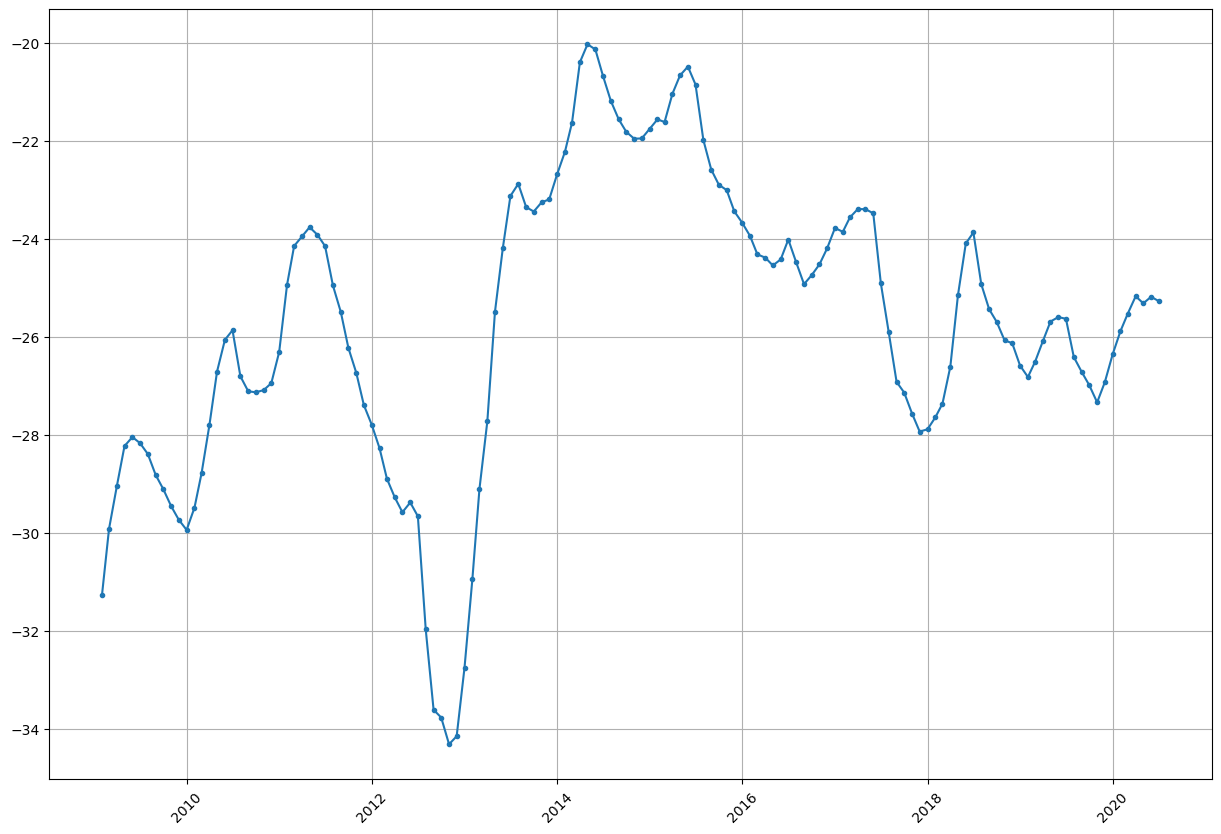

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
plt.plot(ts_df.index,ts_df['Depth_to_Groundwater_P24'], marker='.')
plt.xticks(rotation=45)
plt.grid(True)

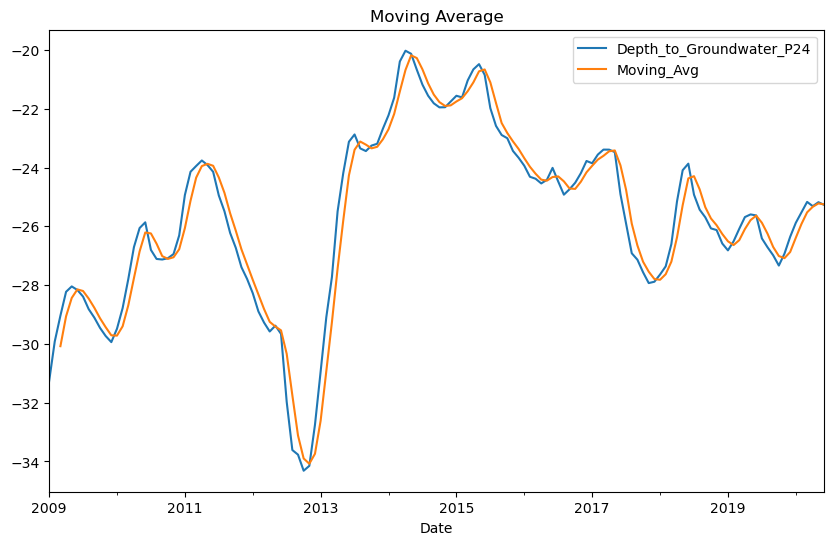

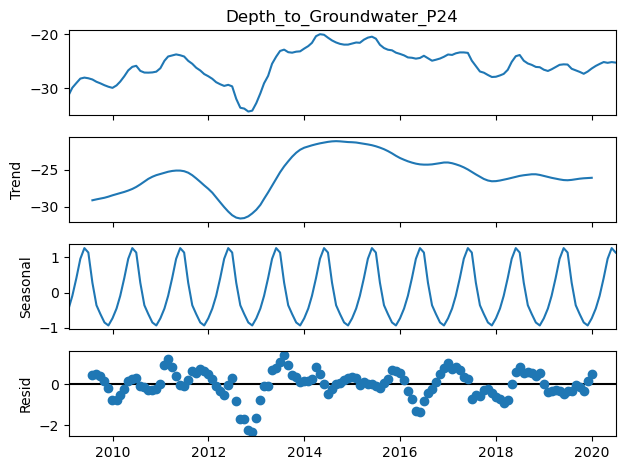

In [7]:
ts_df['Moving_Avg'] = ts_df['Depth_to_Groundwater_P24'].rolling(window=3).mean()
ts_df[['Depth_to_Groundwater_P24', 'Moving_Avg']].plot(figsize=(10, 6))
plt.title('Moving Average')
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_df['Depth_to_Groundwater_P24'], model='additive')
decomposition.plot()
plt.show()

In [8]:
# for i in ts_df.columns:
#     ts_df[i].plot(kind='box')
#     plt.show()
    
# import seaborn as sns
# sns.pairplot(ts_df)

In [9]:
# ts_df.duplicated().sum()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `Prev_Depth_to_Groundwater_P24`, which represents the previous day's groundwater depth. This helps capture the effect of past values on current observations.

- **Date Features**: Extract meaningful time-based features from the `Date` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.
  - **IsWeekend**: A binary feature that distinguishes between weekdays and weekends.
  - **Difference between Depth_to_Groundwater_P24**: Calculate the difference between consecutive values in the `Depth_to_Groundwater_P24` column to highlight short-term changes in groundwater depth.

In [10]:
lags = []
for i in range(1, 6):
    ts_df[f'Lag_{i}'] = ts_df['Depth_to_Groundwater_P24'].shift(i)
    lags.append(f'Lag_{i}')
    
    
ts_df.dropna(inplace=True)

In [11]:
ts_df

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Moving_Avg,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,,
2009-06-30,0.010000,-28.167333,-27.522000,21.203333,20.273333,-31514.832000,2.053333,-28.147380,-28.045806,-28.229000,-29.041613,-29.918214,-31.278387
2009-07-31,0.058065,-28.391613,-27.721613,25.393548,24.287097,-32104.790710,2.058065,-28.201584,-28.167333,-28.045806,-28.229000,-29.041613,-29.918214
2009-08-31,1.522581,-28.819355,-28.175806,25.780645,25.122581,-31489.901419,2.041935,-28.459434,-28.391613,-28.167333,-28.045806,-28.229000,-29.041613
2009-09-30,0.453333,-29.108667,-28.435000,21.060000,20.723333,-33777.964800,2.000000,-28.773211,-28.819355,-28.391613,-28.167333,-28.045806,-28.229000
2009-10-31,0.345161,-29.456129,-28.755161,13.948387,13.754839,-35408.002065,1.945161,-29.128050,-29.108667,-28.819355,-28.391613,-28.167333,-28.045806
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,0.641379,-25.523103,-25.261724,8.989655,8.748276,-28354.096552,2.420690,-25.921357,-25.881935,-26.359032,-26.929667,-27.336452,-26.987000
2020-03-31,2.492857,-25.170357,-24.965000,9.689286,9.403571,-26900.362286,2.721429,-25.525132,-25.523103,-25.881935,-26.359032,-26.929667,-27.336452
2020-04-30,1.434483,-25.315517,-24.807586,14.293103,13.796552,-24687.936000,2.496552,-25.336326,-25.170357,-25.523103,-25.881935,-26.359032,-26.929667


In [12]:
ts_df['Day_of_the_week']= ts_df.index.day_of_week
ts_df['Month'] = ts_df.index.month
ts_df['Day_of_the_year'] = ts_df.index.day_of_year
ts_df['isWeeked']= ts_df['Day_of_the_week'] >= 5


ts_df['Difference_between_depth_to_groundwater_p24']= ts_df['Day_of_the_week'].diff()

In [13]:
ts_df.isna().sum()
ts_df.dropna(inplace=True)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [14]:
from sklearn.model_selection import train_test_split

X = ts_df.drop(columns=['Depth_to_Groundwater_P24'])
y = ts_df['Depth_to_Groundwater_P24']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2,shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# ts_df.describe()

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [16]:
# pip install pmdarima

In [17]:
# ts_df

In [18]:
# from pmdarima import auto_arima


# stepwise_fit = auto_arima(ts_df['Depth_to_Groundwater_P24'], start_p = 1, start_q = 1,
#                         max_p = 5, max_q = 5, m = 12,
#                         start_P = 1, seasonal = True,
#                         d = None, D = None, trace = True,
#                         # error_action ='ignore',   # we don't want to know if an order does not work
#                         # suppress_warnings = True,  # we don't want convergence warnings
#                         stepwise = True)

In [19]:
# stepwise_fit.summary()

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
# y_pred = stepwise_fit.predict(X_test,typ='levels').rename('Predictions')

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
# y_pred.plot()
# pd.DataFrame(y_test).plot()

In [ ]:
# from sklearn.metrics import mean_squared_error
# from statsmodels.tools.eval_measures import rmse


# print(mean_squared_error(y_pred,y_test))
# print(rmse(y_pred,y_test))


mse = 1.29

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [23]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Dropout,Input

from keras.callbacks import EarlyStopping

In [25]:
model_rnn = Sequential([
    Input(shape=(X_train.shape[1],1)),
    SimpleRNN(units=25, return_sequences=True),
    Dropout(0.25),
    
    SimpleRNN(units=25),
    Dropout(0.25),
    
    
    # SimpleRNN(units=50, return_sequences=True)
    # Dropout(0.25)
    
    Dense(units=1)
])

model_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 17, 25)         │           675 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 25)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,976 (7.72 KB)

 Trainable params: 1,976 (7.72 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model_rnn.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [29]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

model_rnn.fit(X_train,y_train,epochs=2000,validation_split=0.2,callbacks=early_stopping)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 215.3896 - mean_squared_error: 215.3896 - val_loss: 198.3204 - val_mean_squared_error: 198.3204
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 209.5143 - mean_squared_error: 209.5143 - val_loss: 196.4581 - val_mean_squared_error: 196.4581
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 219.8186 - mean_squared_error: 219.8186 - val_loss: 194.6054 - val_mean_squared_error: 194.6054
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 215.2500 - mean_squared_error: 215.2500 - val_loss: 192.7738 - val_mean_squared_error: 192.7738
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 218.2341 - mean_squared_error: 218.2341 - val_loss: 190.9578 - val_mean_squared_error: 190.9578
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 205.7329 - mean_squared_error: 205.7329 - val_loss: 189.1577 - val_mean_squared_error: 189.1577
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 205.8167 - 

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [30]:
y_pred = model_rnn.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: xlabel='Date'>

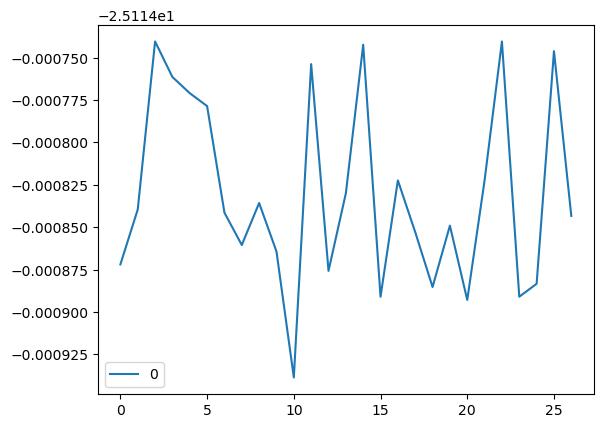

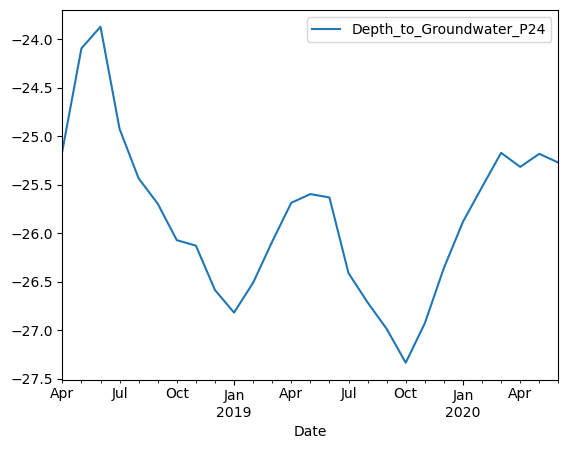

In [36]:
pd.DataFrame(y_pred).plot()
pd.DataFrame(y_test).plot()

In [34]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


print(mean_squared_error(y_pred,y_test))
print(rmse(y_pred,y_test))


1.1908309945005673
[0.03683613 1.02224994 1.24583058 0.19095962 0.31968555 0.58050275
 0.9571049  1.01316942 1.47129845 1.70452426 1.39624085 0.97183609
 0.57150275 0.48129845 0.51616942 1.29678232 1.59904039 1.87216942
 2.22162103 1.81483609 1.24420168 0.7671049  0.40827287 0.05552659
 0.20068667 0.0658146  0.15620391]


## Conclusion and Interpretation

Write your conclusions based on the model's performance and the forecast.

**Instructions:**
- Interpret the results and discuss the effectiveness of your model.
- Suggest potential improvements.